In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mass=np.array([6,4.4,5,9,7.2,4.8,6,10,8,5.6,6.4,11,9,6.6,7,10.8],float)

In [3]:
summ = np.array([],float)
p = 4
for i in range(0,len(mass)-p+1):
    temp = 0
    for j in range(i,i+p):
        temp = temp + mass[j]
    summ = np.append(summ,temp)
summ

array([24.4, 25.6, 26. , 27. , 28. , 28.8, 29.6, 30. , 31. , 32. , 33. ,
       33.6, 33.4])

In [4]:
sred = np.array([],float)
p = 4
for i in range(0,len(mass)-p+1):
    temp = 0
    for j in range(i,i+p):
        temp = temp + mass[j]
    sred = np.append(sred,temp/p)
sred

array([6.1 , 6.4 , 6.5 , 6.75, 7.  , 7.2 , 7.4 , 7.5 , 7.75, 8.  , 8.25,
       8.4 , 8.35])

In [5]:
center_sred = np.array([],float)
p = 2
for i in range(0,len(sred)-p+1):
    temp = 0
    for j in range(i,i+p):
        temp = temp + sred[j]
    center_sred = np.append(center_sred,temp/p)
center_sred

array([6.25 , 6.45 , 6.625, 6.875, 7.1  , 7.3  , 7.45 , 7.625, 7.875,
       8.125, 8.325, 8.375])

In [6]:
season_comp = np.array([],float)
for i in range(2,len(mass)-2):
    temp = mass[i] - center_sred[i-2]
    season_comp = np.append(season_comp,temp)
season_comp

array([-1.25 ,  2.55 ,  0.575, -2.075, -1.1  ,  2.7  ,  0.55 , -2.025,
       -1.475,  2.875,  0.675, -1.775])

In [7]:
first_q = np.array([],float)
second_q = np.array([],float)
third_q = np.array([],float)
fourth_q = np.array([],float)
for i in range (0,len(season_comp)):
    if (i%4==4) | (i%4==0):
        third_q = np.append(third_q,season_comp[i])
    elif (i%4==1):
        fourth_q = np.append(fourth_q,season_comp[i])
    elif (i%4==2):
        first_q = np.append(first_q,season_comp[i])
    else:
        second_q = np.append(second_q,season_comp[i])

In [10]:
cor_koef = (first_q.mean() + second_q.mean() + third_q.mean() + fourth_q.mean()) / 4

In [11]:
cor_koef

0.018750000000000155

In [12]:
first_q_sez = first_q.mean() - cor_koef
second_q_sez = second_q.mean() - cor_koef
third_q_sez = third_q.mean() - cor_koef
fourth_q_sez = fourth_q.mean() - cor_koef

In [13]:
first_q_sez + second_q_sez + third_q_sez + fourth_q_sez

0.0

In [14]:
mass_sez = np.array([],float)
for i in range(0,len(mass)):
    if (i%4==4) | (i%4==0):
        mass_sez = np.append(mass_sez,first_q_sez)
    elif (i%4==1):
        mass_sez = np.append(mass_sez,second_q_sez)
    elif (i%4==2):
        mass_sez = np.append(mass_sez,third_q_sez)
    else:
        mass_sez = np.append(mass_sez,fourth_q_sez)

In [15]:
mass_sez

array([ 0.58125   , -1.97708333, -1.29375   ,  2.68958333,  0.58125   ,
       -1.97708333, -1.29375   ,  2.68958333,  0.58125   , -1.97708333,
       -1.29375   ,  2.68958333,  0.58125   , -1.97708333, -1.29375   ,
        2.68958333])

In [16]:
mass_TE = np.zeros(16)
for i in range(0,len(mass_TE)):
    mass_TE[i] = mass[i] - mass_sez[i]
mass_TE

array([5.41875   , 6.37708333, 6.29375   , 6.31041667, 6.61875   ,
       6.77708333, 7.29375   , 7.31041667, 7.41875   , 7.57708333,
       7.69375   , 8.31041667, 8.41875   , 8.57708333, 8.29375   ,
       8.11041667])

In [17]:
time = np.array(range(1,17),int)

In [18]:
time

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [19]:
sum1=0
sum2=0

for i in time:
    sum1=sum1+(i*mass_TE[i-1])
    sum2=sum2+(i*i)
sum1=sum1-mass_TE.size*time.mean()*mass_TE.mean()
sum2=sum2-mass_TE.size*time.mean()*time.mean()
a1=sum1/sum2
a0=mass_TE.mean()-a1*time.mean()
print(a0,a1)

5.715416666666668 0.18642156862745096


T = 5.71 + 0.18 * t

In [20]:
mass_T = np.zeros(16)
for i in range(0,len(mass_T)):
    mass_T[i] = a0 + a1*time[i]
mass_T

array([5.90183824, 6.0882598 , 6.27468137, 6.46110294, 6.64752451,
       6.83394608, 7.02036765, 7.20678922, 7.39321078, 7.57963235,
       7.76605392, 7.95247549, 8.13889706, 8.32531863, 8.5117402 ,
       8.69816176])

In [21]:
mass_TS = np.zeros(16)
for i in range(0,len(mass_TS)):
    mass_TS[i] = mass_T[i] + mass_sez[i]
mass_TS

array([ 6.48308824,  4.11117647,  4.98093137,  9.15068627,  7.22877451,
        4.85686275,  5.72661765,  9.89637255,  7.97446078,  5.60254902,
        6.47230392, 10.64205882,  8.72014706,  6.34823529,  7.2179902 ,
       11.3877451 ])

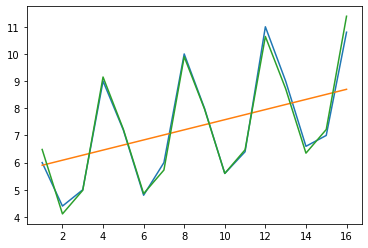

In [22]:
plt.plot(time,mass) #Исходные данные (Синия линия)
plt.plot(time,mass_T) #Линейный тренд (желтая линия)
plt.plot(time,mass_TS) #TS (Зеленая линия)

In [23]:
mass_E = np.zeros(16)
for i in range(0,len(mass_E)):
    mass_E[i] = mass[i] - mass_TS[i]
mass_E

array([-0.48308824,  0.28882353,  0.01906863, -0.15068627, -0.02877451,
       -0.05686275,  0.27338235,  0.10362745,  0.02553922, -0.00254902,
       -0.07230392,  0.35794118,  0.27985294,  0.25176471, -0.2179902 ,
       -0.5877451 ])

In [24]:
100-mass_E.var()/mass.var()*100

98.36400953905598

## Аддитивная модель объясняет 98.36% общей вариации уровней временного ряда

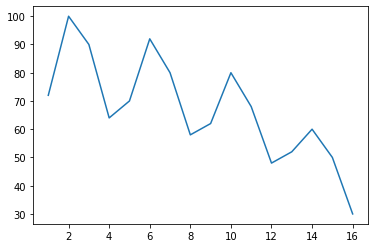

In [27]:
mass2=np.array([72,100,90,64,70,92,80,58,62,80,68,48,52,60,50,30],float)
time = np.array(range(1,17),int)
plt.plot(time,mass2)

In [28]:
summ2 = np.array([],float)
p = 4
for i in range(0,len(mass2)-p+1):
    temp = 0
    for j in range(i,i+p):
        temp = temp + mass2[j]
    summ2 = np.append(summ2,temp)
summ2

array([326., 324., 316., 306., 300., 292., 280., 268., 258., 248., 228.,
       210., 192.])

In [29]:
sred2 = np.array([],float)
p = 4
for i in range(0,len(mass2)-p+1):
    temp = 0
    for j in range(i,i+p):
        temp = temp + mass2[j]
    sred2 = np.append(sred2,temp/p)
sred2

array([81.5, 81. , 79. , 76.5, 75. , 73. , 70. , 67. , 64.5, 62. , 57. ,
       52.5, 48. ])

In [30]:
center_sred2 = np.array([],float)
p = 2
for i in range(0,len(sred2)-p+1):
    temp = 0
    for j in range(i,i+p):
        temp = temp + sred2[j]
    center_sred2 = np.append(center_sred2,temp/p)
center_sred2

array([81.25, 80.  , 77.75, 75.75, 74.  , 71.5 , 68.5 , 65.75, 63.25,
       59.5 , 54.75, 50.25])

In [33]:
season_comp2 = np.array([],float)
for i in range(2,len(mass2)-2):
    temp = mass2[i] / center_sred2[i-2]
    season_comp2 = np.append(season_comp2,temp)
season_comp2

array([1.10769231, 0.8       , 0.90032154, 1.21452145, 1.08108108,
       0.81118881, 0.90510949, 1.21673004, 1.07509881, 0.80672269,
       0.94977169, 1.19402985])

In [34]:
first_q2 = np.array([],float)
second_q2 = np.array([],float)
third_q2 = np.array([],float)
fourth_q2 = np.array([],float)
for i in range (0,len(season_comp2)):
    if (i%4==4) | (i%4==0):
        third_q2 = np.append(third_q2,season_comp2[i])
    elif (i%4==1):
        fourth_q2 = np.append(fourth_q2,season_comp2[i])
    elif (i%4==2):
        first_q2 = np.append(first_q2,season_comp2[i])
    else:
        second_q2 = np.append(second_q2,season_comp2[i])

In [40]:
cor_koef2 = 4 / (first_q2.mean() + second_q2.mean() + third_q2.mean() + fourth_q2.mean())
cor_koef2

0.9948378060124525

In [42]:
first_q_sez2 = first_q2.mean() * cor_koef2
second_q_sez2 = second_q2.mean() * cor_koef2
third_q_sez2 = third_q2.mean() * cor_koef2
fourth_q_sez2 = fourth_q2.mean() * cor_koef2
first_q_sez2 + second_q_sez2 + third_q_sez2 + fourth_q_sez2

4.0

In [44]:
mass_sez2 = np.array([],float)
for i in range(0,len(mass2)):
    if (i%4==4) | (i%4==0):
        mass_sez2 = np.append(mass_sez2,first_q_sez2)
    elif (i%4==1):
        mass_sez2 = np.append(mass_sez2,second_q_sez2)
    elif (i%4==2):
        mass_sez2 = np.append(mass_sez2,third_q_sez2)
    else:
        mass_sez2 = np.append(mass_sez2,fourth_q_sez2)
mass_sez2

array([0.91365994, 1.20218898, 1.08234115, 0.80180992, 0.91365994,
       1.20218898, 1.08234115, 0.80180992, 0.91365994, 1.20218898,
       1.08234115, 0.80180992, 0.91365994, 1.20218898, 1.08234115,
       0.80180992])

In [45]:
mass_TE2 = np.zeros(16)
for i in range(0,len(mass_TE2)):
    mass_TE2[i] = mass2[i] / mass_sez2[i]
mass_TE2

array([78.8039363 , 83.18159773, 83.15307949, 79.81941615, 76.61493807,
       76.52706991, 73.91384843, 72.33634589, 67.85894515, 66.54527818,
       62.82677117, 59.86456211, 56.91395399, 49.90895864, 46.19615527,
       37.41535132])

In [46]:
sum12=0
sum22=0

for i in time:
    sum12=sum12+(i*mass_TE2[i-1])
    sum22=sum22+(i*i)
sum12=sum12-mass_TE2.size*time.mean()*mass_TE2.mean()
sum22=sum22-mass_TE2.size*time.mean()*time.mean()
a12=sum12/sum22
a02=mass_TE2.mean()-a12*time.mean()
print(a02,a12)

90.56515364125715 -2.7732518415839342


T = 90.56 - 2.77 * t

In [47]:
mass_T2 = np.zeros(16)
for i in range(0,len(mass_T2)):
    mass_T2[i] = a02 + a12*time[i]
mass_T2

array([87.7919018 , 85.01864996, 82.24539812, 79.47214627, 76.69889443,
       73.92564259, 71.15239075, 68.37913891, 65.60588707, 62.83263523,
       60.05938338, 57.28613154, 54.5128797 , 51.73962786, 48.96637602,
       46.19312418])

In [48]:
mass_TS2 = np.zeros(16)
for i in range(0,len(mass_TS2)):
    mass_TS2[i] = mass_T2[i] * mass_sez2[i]
mass_TS2

array([ 80.21194405, 102.20848394,  89.0175791 ,  63.72155557,
        70.07670757,  88.87259275,  77.0111607 ,  54.82707217,
        59.94147108,  75.53670156,  65.00474231,  45.93258878,
        49.8062346 ,  62.20081036,  52.99832392,  37.03810539])

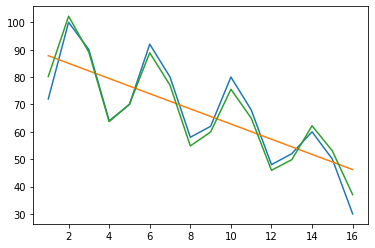

In [49]:
plt.plot(time,mass2) #Исходные данные (Синия линия)
plt.plot(time,mass_T2) #Линейный тренд (желтая линия)
plt.plot(time,mass_TS2) #TS (Зеленая линия)

In [50]:
mass_E2 = np.zeros(16)
for i in range(0,len(mass_E2)):
    mass_E2[i] = mass2[i] / mass_TS2[i]
mass_E2

array([0.89762193, 0.97839236, 1.01103626, 1.00436971, 0.99890538,
       1.03518978, 1.03881047, 1.05787155, 1.03434232, 1.05908781,
       1.04607753, 1.04500968, 1.044046  , 0.96461766, 0.94342606,
       0.80997664])

In [52]:
mass_E2_abs = np.zeros(16)
for i in range(0,len(mass_E2_abs)):
    mass_E2_abs[i] = mass2[i] - mass_TS2[i]
mass_E2_abs

array([-8.21194405, -2.20848394,  0.9824209 ,  0.27844443, -0.07670757,
        3.12740725,  2.9888393 ,  3.17292783,  2.05852892,  4.46329844,
        2.99525769,  2.06741122,  2.1937654 , -2.20081036, -2.99832392,
       -7.03810539])

In [53]:
100-mass_E2_abs.var()/mass2.var()*100

95.86761116295575

## Мультипликативная модель объясняет 95.86% общей вариации уровней временного ряда

# Прогнозирование по аддитивной модели

In [55]:
T17 = a0 + a1*17
T18 = a0 + a1*18
print(T17,T18)

8.884583333333335 9.071004901960785


In [61]:
S1 = mass_sez[0]; S2 = mass_sez[1]
print(S1,S2)

0.58125 -1.9770833333333337


In [62]:
F17 = T17 + S1
F18 = T18 + S2
print (F17,F18)

9.465833333333336 7.093921568627452


In [63]:
F17 + F18

16.559754901960787

### Прогноз потребления электроэнергии на первое полугодие ближайшего следующего года составит 16.56 млн кВт*ч

# Прогнозирование по мультипликативной модели

In [64]:
T17_2 = a02 + a12*17
T18_2 = a02 + a12*18
print (T17_2,T18_2)

43.41987233433027 40.64662049274634


In [65]:
S1_2 = mass_sez2[0]; S2_2 = mass_sez2[1]
print(S1_2,S2_2)

0.9136599436771368 1.2021889784576871


In [67]:
F17_2 = T17_2 * S1_2
F18_2 = T18_2 * S2_2
print (F17_2,F18_2)

39.67099811145267 48.86491916793201


In [68]:
F17_2 + F18_2

88.53591727938468

### Прогноз ожидаемой прибыли компании на первое полугодие ближайшего следующего года составит 88,54 тыс. долл. США.

# Построение модели регрессии временного ряда с фиктивными переменными

In [69]:
mass_3 = mass.copy()

In [70]:
mass_3

array([ 6. ,  4.4,  5. ,  9. ,  7.2,  4.8,  6. , 10. ,  8. ,  5.6,  6.4,
       11. ,  9. ,  6.6,  7. , 10.8])

In [139]:
x1 = np.zeros(16)
x2 = np.zeros(16)
x3 = np.zeros(16)

In [140]:
for i in range(0,len(x1)):
    if i%4 == 0:
        x1[i] = 1
    elif i%4 == 1:
        x2[i] = 1
    elif i%4 == 2:
        x3[i] = 1

In [143]:
A = np.column_stack((time,x1,x2,x3))

In [144]:
A

array([[ 1.,  1.,  0.,  0.],
       [ 2.,  0.,  1.,  0.],
       [ 3.,  0.,  0.,  1.],
       [ 4.,  0.,  0.,  0.],
       [ 5.,  1.,  0.,  0.],
       [ 6.,  0.,  1.,  0.],
       [ 7.,  0.,  0.,  1.],
       [ 8.,  0.,  0.,  0.],
       [ 9.,  1.,  0.,  0.],
       [10.,  0.,  1.,  0.],
       [11.,  0.,  0.,  1.],
       [12.,  0.,  0.,  0.],
       [13.,  1.,  0.,  0.],
       [14.,  0.,  1.,  0.],
       [15.,  0.,  0.,  1.],
       [16.,  0.,  0.,  0.]])

In [145]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(A, mass_3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [147]:
reg.intercept_

8.324999999999998

In [148]:
reg.coef_

array([ 0.1875, -2.0875, -4.475 , -3.9125])

In [153]:
R2 = reg.score(A,mass_3)
R2 # коэффициент детерминации

0.984952324195471

###  Уравнение регрессии имеет вид: y = 8.32 + 0.18 * t - 2.08 * x1 - 4.47 * x2 - 3.91 * x3

In [158]:
C_общ = mass_3.var() * mass_3.size
C_общ # общая сумма квадратов

67.12

In [159]:
C_ост = (1-R2) * C_общ
C_ост # остаточная сумма квадратов

1.0099999999999891

##   1.01<1.10    Модель регрессии с фиктивными переменными описывает динамику временного ряда потребления электроэнергии лучше, чем аддитивная модель